<a href="https://colab.research.google.com/github/JuanOpizzi/Datos-2020-2c/blob/master/TP1_entrega_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico: FiuMark: El Cine Inteligente

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
np.warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

sns.set()

df_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1i-KJ2lSvM7OQH0Yd59bX01VoZcq8Sglq')
df_decision = pd.read_csv('https://drive.google.com/uc?export=download&id=1km-AEIMnWVGqMtK-W28n59hqS5Kufhd0')

In [ ]:
# TO DO: corregir URL read CSV a URL DRIVE = DONE

Echamos un vistazo rápido a los sets de datos provistos y consolidamos ambos en un único DataFrame

In [ ]:
df_data.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo


In [ ]:
df_decision.head()

,id_usuario,volveria
0,117,0
1,658,0
2,794,0
3,455,0
4,173,1


Vamos a desechar las columnas de 'id_usuario' y 'id_ticket', ya que no existen patrones ni ningun dato útil en el soporte de ambos datos. El *id_usuario* es único e independiente de cualquier otro dato que tenemos en el set, y con el *id_ticket* pasa algo similar. Son todos distintos pero estos ya ni siquiera tienen un formato fijo, por lo que podría decirse que son valores random no repetidos.

In [ ]:
#TO DO: justificar drop = DONE

In [ ]:
df = pd.merge(df_data, df_decision, how='inner', left_on='id_usuario', right_on='id_usuario')
df = df.drop(['id_usuario', 'id_ticket'], axis=1)
df_prediccion = df.copy()
df.head()

,tipo_de_sala,nombre,genero,edad,amigos,parientes,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,hombre,73.5,0,0,1,NaN,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,mujer,35.0,1,1,2,NaN,fiumark_quilmes,0
2,normal,Señor Antonio Federico,hombre,NaN,0,0,3,NaN,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,hombre,NaN,0,0,1,NaN,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,mujer,4.0,1,1,2,NaN,fiumark_palermo,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tipo_de_sala   801 non-null    object 
 1   nombre         801 non-null    object 
 2   genero         801 non-null    object 
 3   edad           641 non-null    float64
 4   amigos         801 non-null    int64  
 5   parientes      801 non-null    int64  
 6   precio_ticket  801 non-null    int64  
 7   fila           177 non-null    object 
 8   nombre_sede    799 non-null    object 
 9   volveria       801 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 68.8+ KB


In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df['percent_missing'] = missing_value_df.percent_missing.round()

In [ ]:
missing_value_df

,column_name,percent_missing
tipo_de_sala,tipo_de_sala,0.0
nombre,nombre,0.0
genero,genero,0.0
amigos,amigos,0.0
parientes,parientes,0.0
precio_ticket,precio_ticket,0.0
volveria,volveria,0.0
nombre_sede,nombre_sede,0.0
edad,edad,20.0
fila,fila,78.0


In [ ]:
#TO DO: agregar porcentaje de nulos = DONE

In [ ]:
df.describe()

,edad,amigos,parientes,precio_ticket,volveria
count,641.000000,801.000000,801.000000,801.000000,801.000000
mean,32.688378,0.504370,0.383271,3.453184,0.383271
std,14.380672,1.089859,0.804158,4.629592,0.486487
min,3.420000,0.000000,0.000000,1.000000,0.000000
25%,23.000000,0.000000,0.000000,1.000000,0.000000
50%,31.000000,0.000000,0.000000,2.000000,0.000000
75%,41.000000,1.000000,0.000000,3.000000,1.000000
max,83.000000,8.000000,6.000000,50.000000,1.000000


In [ ]:
df[{'tipo_de_sala','nombre','genero','fila','nombre_sede'}].describe()

,nombre,nombre_sede,fila,tipo_de_sala,genero
count,801,799,177,801,801
unique,801,3,2,3,2
top,Señor Emeterio de Jesus,fiumark_palermo,adelante,4d,hombre
freq,1,579,164,447,513


Viendo las estadísticas básicas de los atributos, destacamos que hay muchos registros con valores faltantes para el atributo 'fila', mientras que para el atributo 'edad' hay muchos menos registros con ese dato en blanco.
Se ve además que 'nombre' tiene solo valores únicos, y que el resto de los atributos casi no presenta nulos.

Tomando como base los resultados de la encuesta procederemos a responder algunas preguntas interesantes sobre los datos.

## ¿Qué edad tienen las personas que van a ver Frozen 3?

A priori sabemos que Frozen es una saga de películas infantiles animadas producida por Walt Disney Animation Studios. Por ende esperamos confirmar la hipótesis de que la mayoría de los espectadores serán personas de corta edad, a saber, niños y/o adolescentes.

In [ ]:
# TO DO: podria sacarse porque no muestra mucho = DONE

Anteriormente se pudo apreciar que el atributo 'edad' viene en formato flotante. Consideramos que, así como está informado, el dato no tiene tanta utilidad para nuestro análisis, por lo que procederemos a aplicarle algunas transformaciones al mismo.

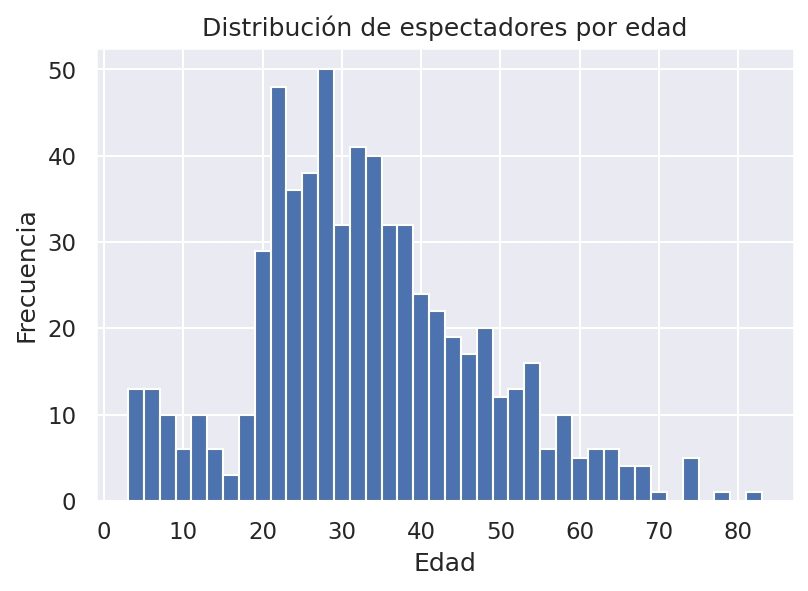

In [ ]:
df['edad'] = df.edad.round()
plt.figure(dpi=150)

plt.hist(df['edad'],bins=40)

plt.title("Distribución de espectadores por edad")
plt.ylabel("Frecuencia")
plt.xlabel("Edad")
plt.show()

In [ ]:
# TO DO: pueden plotearse datos continuos en el histograma = DONE (Se redondea la edad pero no se usa el value counts por rangos)

Es destacable el hecho de que haya tantos espectadores de entre 20 y 40 años, y que los que están por debajo de las dos décadas sean casi la mitad en comparación a los primeros, claro.

<b>Esto refuta la hipótesis planteada al inicio de la sección, pues la mayoría de los espectadores son adultos de entre 20 y 40 años.</b>

## ¿Cómo se compone mi conjunto de clientes frecuentes?
## Según la edad, ¿hay más hombres o mujeres viendo la película?

Aclaramos que con la frase "clientes frecuentes" nos referimos a aquellos clientes cuya edad se encuentra dentro los grupos etarios más populares dentro de nuestro grupo de espectadores (es decir, aquellos que cuentan con mayor frecuencia de aparición en el dataset). También podría aplicarse el término "cliente tipo" o "cliente popular". En ésta y las próximas secciones nos enfocaremos en el estudio del comportamiento de este grupo particular de espectadores.

Indaguemos un poco más acerca de ellos. Enfoquémonos en los grupos etarios que se conforman por al menos 16 espectadores, y que consideran, de hecho, nuestro mayor volumen de clientes.

In [ ]:
over15 = df.edad.value_counts() > 15
edades_over15 = df.edad.value_counts()[over15]
#edades_over15

In [ ]:
# TO DO: sacar VALUE COUNTS => NO TIENE SENTIDO (el df en si es un value counts, 
# hacer un value_counts sobre esto mostrara cosas como "si, tenes 3 tipos de edades que tienen 18 personas" 
# no le veo ningun sentido)
# DONE

In [ ]:
df_grueso_clientes = df[df.edad.isin(edades_over15.index)].copy()
df_grueso_clientes.head()

,tipo_de_sala,nombre,genero,edad,amigos,parientes,precio_ticket,fila,nombre_sede,volveria
7,4d,Señor Carlos Gregorio,hombre,32.0,0,0,1,NaN,fiumark_palermo,0
11,4d,Señor Ernesto Reginaldo,hombre,27.0,0,0,1,NaN,fiumark_palermo,0
12,4d,Señor Paulino Virgilio,hombre,34.0,0,0,1,NaN,fiumark_palermo,0
14,4d,Señor Rubens Carlos Randy,hombre,29.0,0,0,6,NaN,fiumark_palermo,1
17,4d,Señorita Alicia Augusta,mujer,24.0,0,0,1,NaN,fiumark_palermo,1


In [ ]:
df_grueso_clientes['cont_edad_genero'] = 1
df_grueso_clientes.head()

,tipo_de_sala,nombre,genero,edad,amigos,parientes,precio_ticket,fila,nombre_sede,volveria,cont_edad_genero
7,4d,Señor Carlos Gregorio,hombre,32.0,0,0,1,NaN,fiumark_palermo,0,1
11,4d,Señor Ernesto Reginaldo,hombre,27.0,0,0,1,NaN,fiumark_palermo,0,1
12,4d,Señor Paulino Virgilio,hombre,34.0,0,0,1,NaN,fiumark_palermo,0,1
14,4d,Señor Rubens Carlos Randy,hombre,29.0,0,0,6,NaN,fiumark_palermo,1,1
17,4d,Señorita Alicia Augusta,mujer,24.0,0,0,1,NaN,fiumark_palermo,1,1


In [ ]:
df_edad_genero = df_grueso_clientes.loc[:, ['edad', 'genero', 'cont_edad_genero']\
                                       ].groupby(by=["edad", "genero"]).sum()
df_edad_genero.columns = ['cont_edad_genero']
df_edad_genero = df_edad_genero.unstack()

In [ ]:
# TO DO: grafico para mostrar cuadro = DONE
df_edad_genero_sum = df_edad_genero.sum().reset_index().drop('level_0',axis=1)
df_edad_genero_sum.columns = ['genero','cant']
df_edad_genero_sum

,genero,cant
0,hombre,203
1,mujer,126


Text(0.5, 0, 'Género')

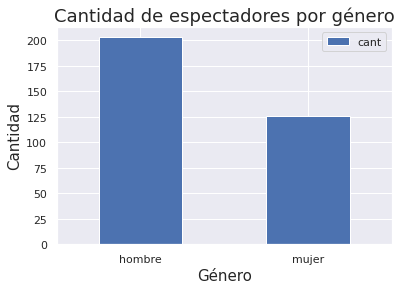

In [ ]:
g = df_edad_genero_sum.plot.bar(x='genero', y='cant', rot=0)
g.set_title("Cantidad de espectadores por género", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Género", fontsize=15)

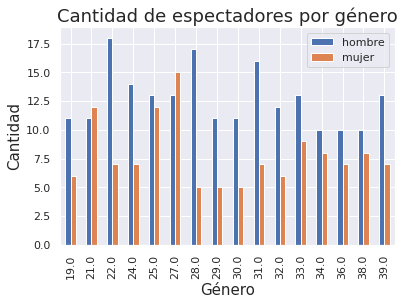

In [ ]:
g = df_edad_genero.plot.bar()
g.set_title("Cantidad de espectadores por género", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Género", fontsize=15)
g.legend([df_edad_genero.columns[0][1],df_edad_genero.columns[1][1]])

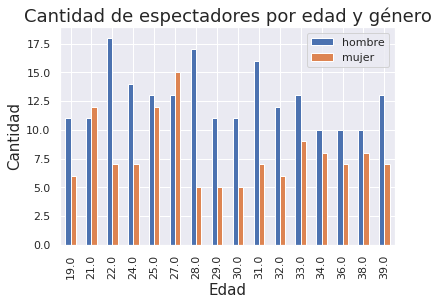

In [ ]:
g = df_edad_genero.plot.bar()
g.set_title("Cantidad de espectadores por edad y género", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)
g.legend([df_edad_genero.columns[0][1],df_edad_genero.columns[1][1]])

Analíticamente se obtiene que el número de espectadores de sexo masculino es 203, y supera casi por el doble al número de mujeres, que es 126. Asimismo, el gráfico muestra que este fenómeno ocurre para varias de las edades analizadas.

<b>Esto nos permite decir que en nuestra selección de clientes más frecuentes hay más hombres que mujeres (la relación entre ambos sexos es casi 60%-40%).</b>

## Según la edad, ¿existe alguna preferencia de sede?

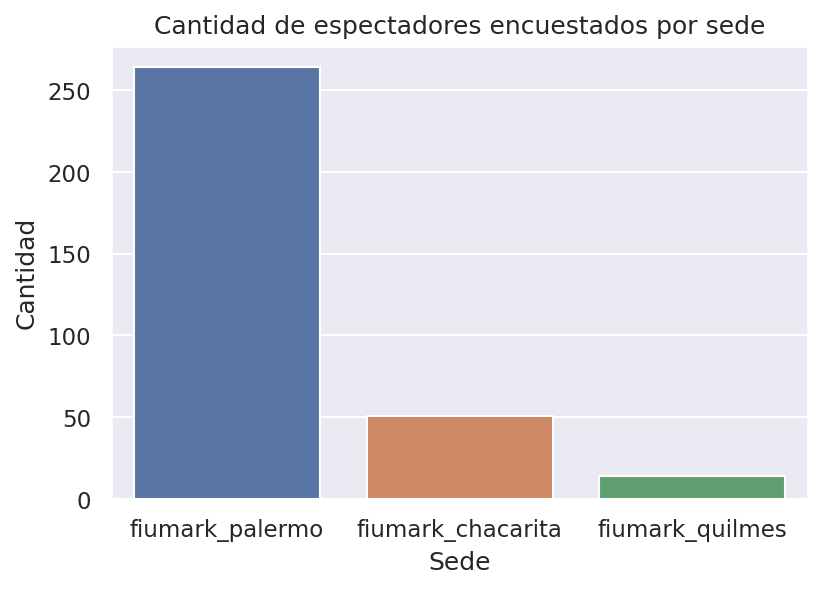

In [ ]:
plt.figure(dpi=150)
sns.countplot(x="nombre_sede", data=df_grueso_clientes, \
              order=df_grueso_clientes["nombre_sede"].value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Sede")
plt.title("Cantidad de espectadores encuestados por sede")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_grueso_clientes['cont_edad_sede'] = 1
df_edad_sede = df_grueso_clientes.loc[:, ['edad', 'nombre_sede', 'cont_edad_sede']\
                                     ].groupby(by=["edad", "nombre_sede"]).sum()
df_edad_sede.columns = ['cont_edad_sede']
df_edad_sede = df_edad_sede.unstack()
df_edad_sede

cont_edad_sede                                
nombre_sede fiumark_chacarita fiumark_palermo fiumark_quilmes
edad                                                         
19.0                      1.0            14.0             2.0
21.0                      4.0            18.0             1.0
22.0                      1.0            22.0             2.0
24.0                      1.0            18.0             2.0
25.0                      4.0            20.0             1.0
27.0                      7.0            21.0             NaN
28.0                      3.0            18.0             1.0
29.0                      2.0            14.0             NaN
30.0                      4.0            12.0             NaN
31.0                      2.0            21.0             NaN
32.0                      3.0            14.0             1.0
33.0                      7.0            14.0             1.0
34.0                      2.0            14.0             2.0
36.0                      3.0            13.0             1.0
38.0                      4.0            14.0             NaN
39.0                      3.0            17.0             NaN

In [ ]:
df_edad_sede.sum()

                nombre_sede      
cont_edad_sede  fiumark_chacarita     51.0
                fiumark_palermo      264.0
                fiumark_quilmes       14.0
dtype: float64

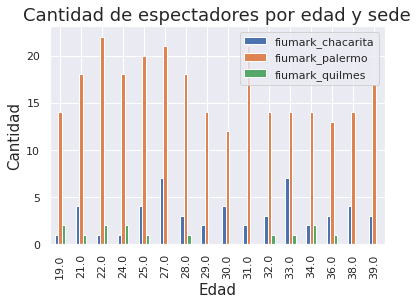

In [ ]:
g = df_edad_sede.plot.bar()
g.set_title("Cantidad de espectadores por edad y sede", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)
g.legend([df_edad_sede.columns[0][1],df_edad_sede.columns[1][1],df_edad_sede.columns[2][1]])

Se destaca que la cantidad de espectadores encuestados en la sede de Palermo supera ampliamente a aquellas correspondientes a las sedes de Quilmes y Chacarita. De hecho concentra el 80% de los encuestados. La distribución es bastante pareja en líneas generales.

<b>No podemos concluir que la edad de los encuestados y la sede a la que asisten presenten alguna correlación.</b>

## Según la edad, ¿existe alguna preferencia sobre el tipo de sala?

In [ ]:
df_grueso_clientes['cont_edad_sala'] = 1
df_edad_sala = df_grueso_clientes.loc[:, ['edad', 'tipo_de_sala', 'cont_edad_sala']\
                                     ].groupby(by=['edad', 'tipo_de_sala']).sum()
df_edad_sala.columns = ['cont_edad_sala']
df_edad_sala = df_edad_sala.unstack()
df_edad_sala

cont_edad_sala           
tipo_de_sala             3d  4d normal
edad                                  
19.0                      2  12      3
21.0                      5  14      4
22.0                      6  14      5
24.0                      3  15      3
25.0                      2  18      5
27.0                     10  11      7
28.0                      7  13      2
29.0                      2  12      2
30.0                      4   8      4
31.0                      8  11      4
32.0                      5  11      2
33.0                      6  10      6
34.0                      5   9      4
36.0                      5   8      4
38.0                      3   7      8
39.0                      7   5      8

In [ ]:
df_edad_sala.sum()

                tipo_de_sala
cont_edad_sala  3d               80
                4d              178
                normal           71
dtype: int64

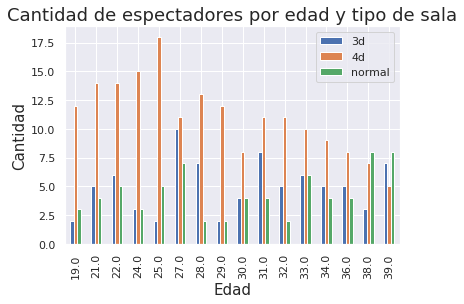

In [ ]:
g = df_edad_sala.plot.bar()
g.set_title("Cantidad de espectadores por edad y tipo de sala", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)
g.legend([df_edad_sala.columns[0][1],df_edad_sala.columns[1][1],df_edad_sala.columns[2][1]])

Aproximadamente la mitad de los encuestados vió Frozen 3 en una sala 4D. Esto hace que las barras naranjas sean tan altas. La distribución es bastante pareja en líneas generales.

<b>No podemos concluir que la edad de los encuestados y el tipo de sala a la que asisten presenten alguna correlación.</b>

## ¿Con cuántos acompañantes fueron al cine?

Consideramos "acompañantes" a la suma de parientes y amigos que acompañan a un usuario al cine.

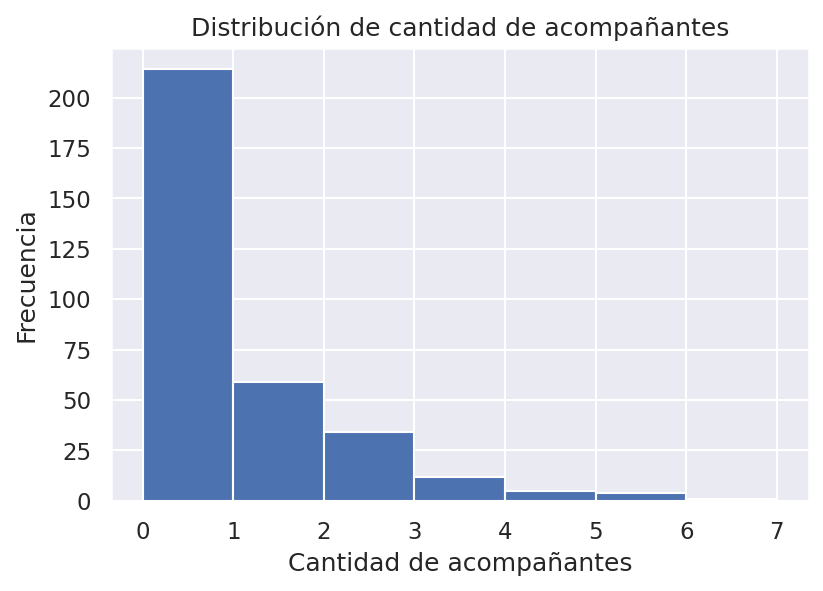

In [ ]:
df_grueso_clientes['cant_acompañantes'] = df_grueso_clientes['parientes'] + df_grueso_clientes['amigos']

plt.figure(dpi=150)

plt.hist(df_grueso_clientes['cant_acompañantes'],bins=7)

plt.title("Distribución de cantidad de acompañantes")
plt.ylabel("Frecuencia")
plt.xlabel("Cantidad de acompañantes")
plt.show()

<b>La gran mayoría de los encuestados (en nuestro público objetivo) fueron al cine solos.</b>

## ¿Existe relación entre la edad de los espectadores y la decisión de ver la secuela del film?

In [ ]:
df['volveria'].replace({0: 'No', 1: 'Si'}, inplace=True)

Los siguientes DataFrames los usaremos ampliamente a lo largo del informe, y nos servirán para separar a aquellos espectadores que volverían al cine a ver la película Frozen 4, de los que no lo harían.

In [ ]:
df_volveria = df[(df['volveria'] == 'Si')].copy()
df_volveria.head()

,tipo_de_sala,nombre,genero,edad,amigos,parientes,precio_ticket,fila,nombre_sede,volveria
4,4d,Señorita Rita Eudosia,mujer,4.0,1,1,2,NaN,fiumark_palermo,Si
8,normal,Señor Carlos Roberto Francisco,hombre,41.0,1,0,9,adelante,fiumark_palermo,Si
9,normal,Señora Lidia Barbarita,mujer,59.0,0,1,9,adelante,fiumark_chacarita,Si
13,3d,Señora Bernarda Agapita,mujer,45.0,0,0,2,NaN,fiumark_palermo,Si
14,4d,Señor Rubens Carlos Randy,hombre,29.0,0,0,6,NaN,fiumark_palermo,Si


In [ ]:
df_no_volveria = df[(df['volveria'] == 'No')].copy()
df_no_volveria.head()

,tipo_de_sala,nombre,genero,edad,amigos,parientes,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,hombre,74.0,0,0,1,NaN,fiumark_quilmes,No
1,4d,Señora Raquel Angelica,mujer,35.0,1,1,2,NaN,fiumark_quilmes,No
2,normal,Señor Antonio Federico,hombre,NaN,0,0,3,NaN,fiumark_chacarita,No
3,4d,Señor Osvaldo Aureliano,hombre,NaN,0,0,1,NaN,fiumark_palermo,No
5,normal,Señor Raimundo Longino,hombre,NaN,0,0,4,adelante,fiumark_palermo,No


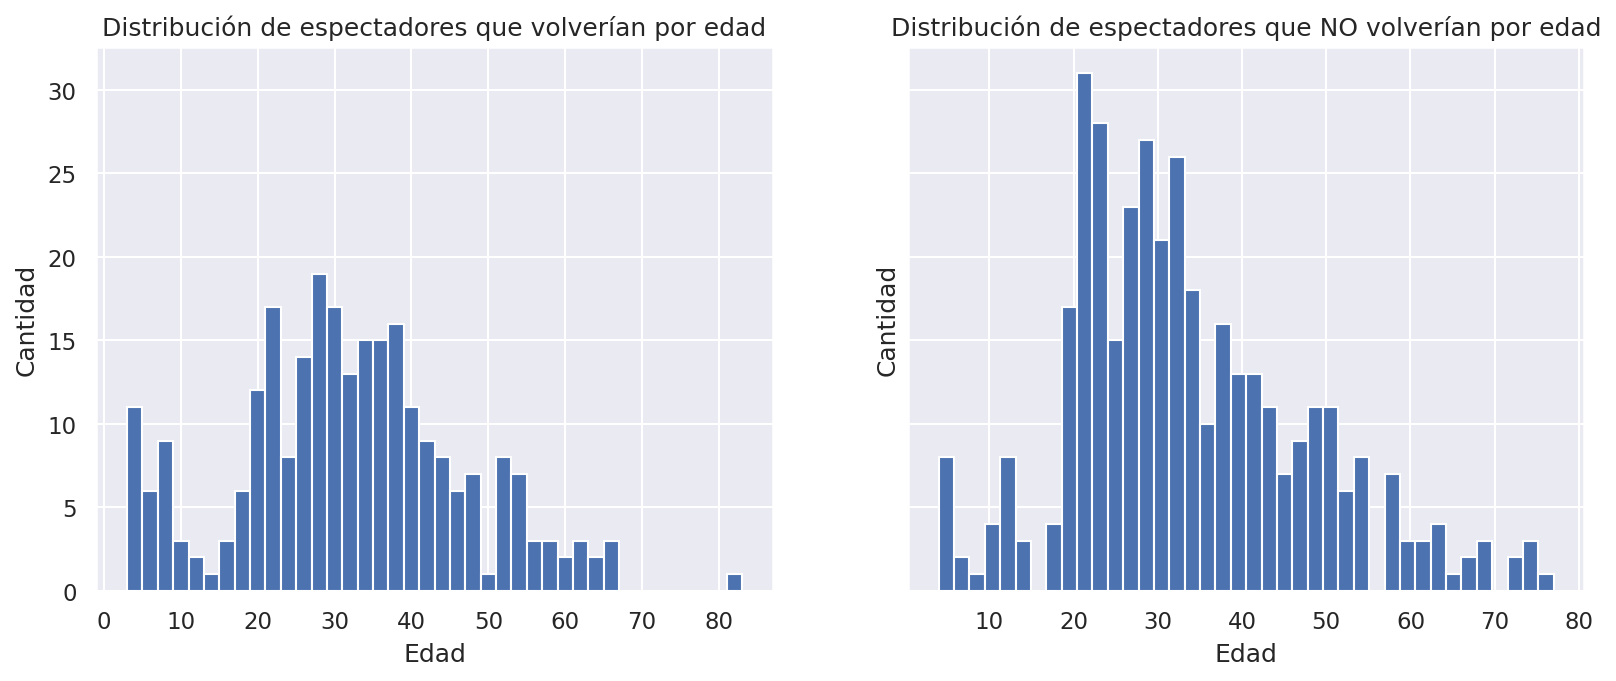

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].hist(df_volveria['edad'], bins=40)
axes[0].set_title("Distribución de espectadores que volverían por edad")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Cantidad")

axes[1].hist(df_no_volveria['edad'], bins=40)
axes[1].set_title("Distribución de espectadores que NO volverían por edad")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Cantidad")

plt.show()

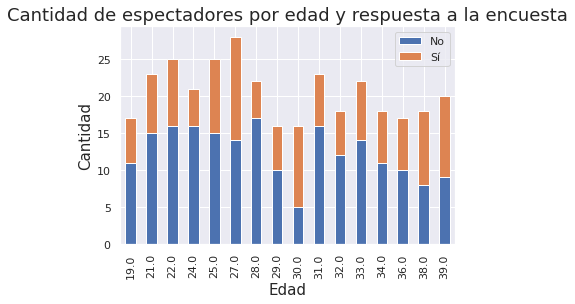

In [ ]:
df_grueso_clientes['cont_volvera'] = 1
df_edad_volvera = df_grueso_clientes.loc[:, ['edad', 'volveria', 'cont_volvera']\
                                        ].groupby(by=["edad", 'volveria']).sum()
df_edad_volvera.columns = ['cont_volvera']
df_edad_volvera = df_edad_volvera.unstack()
g = df_edad_volvera.plot.bar(stacked = True)
g.set_title("Cantidad de espectadores por edad y respuesta a la encuesta", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)
g.legend(["No","Sí"])

Lo más llamativo de esta comparación es que, para la franja etaria que va de 20 a 40 años, hay muchas más respuestas negativas, frente a la pregunta de si volverían o no a ver Frozen 4. También se ve una ligera predominancia de la misma respuesta en el rango de 65 años o más.

<b>Las diferencias no son lo suficientemente notorias como para afirmar que la edad influye directamente en la decisión de volver o no al cine.</b> 

## ¿Las personas vuelven a ver Frozen 4 si fueron al cine acompañadas?

Respondamos a la pregunta de si la cantidad de gente con la que los clientes van a ver Frozen 3 tiene relación con su decisión de volver o no.

In [ ]:
df_volveria['aparicion'] = 1
df_volveria['cant_acompañantes'] = df_volveria['parientes'] + df_volveria['amigos']

df_no_volveria['aparicion'] = 1
df_no_volveria['cant_acompañantes'] = df_no_volveria['parientes'] + df_no_volveria['amigos']

In [ ]:
df_amigos_volveria = df_volveria.groupby(by=['amigos']).agg({"aparicion": "sum"})
df_amigos_volveria = df_amigos_volveria.reset_index()

df_amigos_no_volveria = df_no_volveria.groupby(by=['amigos']).agg({"aparicion": "sum"})
df_amigos_no_volveria = df_amigos_no_volveria.reset_index()

df_parientes_volveria = df_volveria.groupby(by=['parientes']).agg({"aparicion": "sum"})
df_parientes_volveria = df_parientes_volveria.reset_index()

df_parientes_no_volveria = df_no_volveria.groupby(by=['parientes']).agg({"aparicion": "sum"})
df_parientes_no_volveria = df_parientes_no_volveria.reset_index()

df_acompañado_volveria = df_volveria.groupby(by=['cant_acompañantes']).agg({"aparicion": "sum"})
df_acompañado_volveria = df_acompañado_volveria.reset_index()

df_acompañado_no_volveria = df_no_volveria.groupby(by=['cant_acompañantes']).agg({"aparicion": "sum"})
df_acompañado_no_volveria = df_acompañado_no_volveria.reset_index()

Text(0, 0.5, 'Cantidad de clientes')

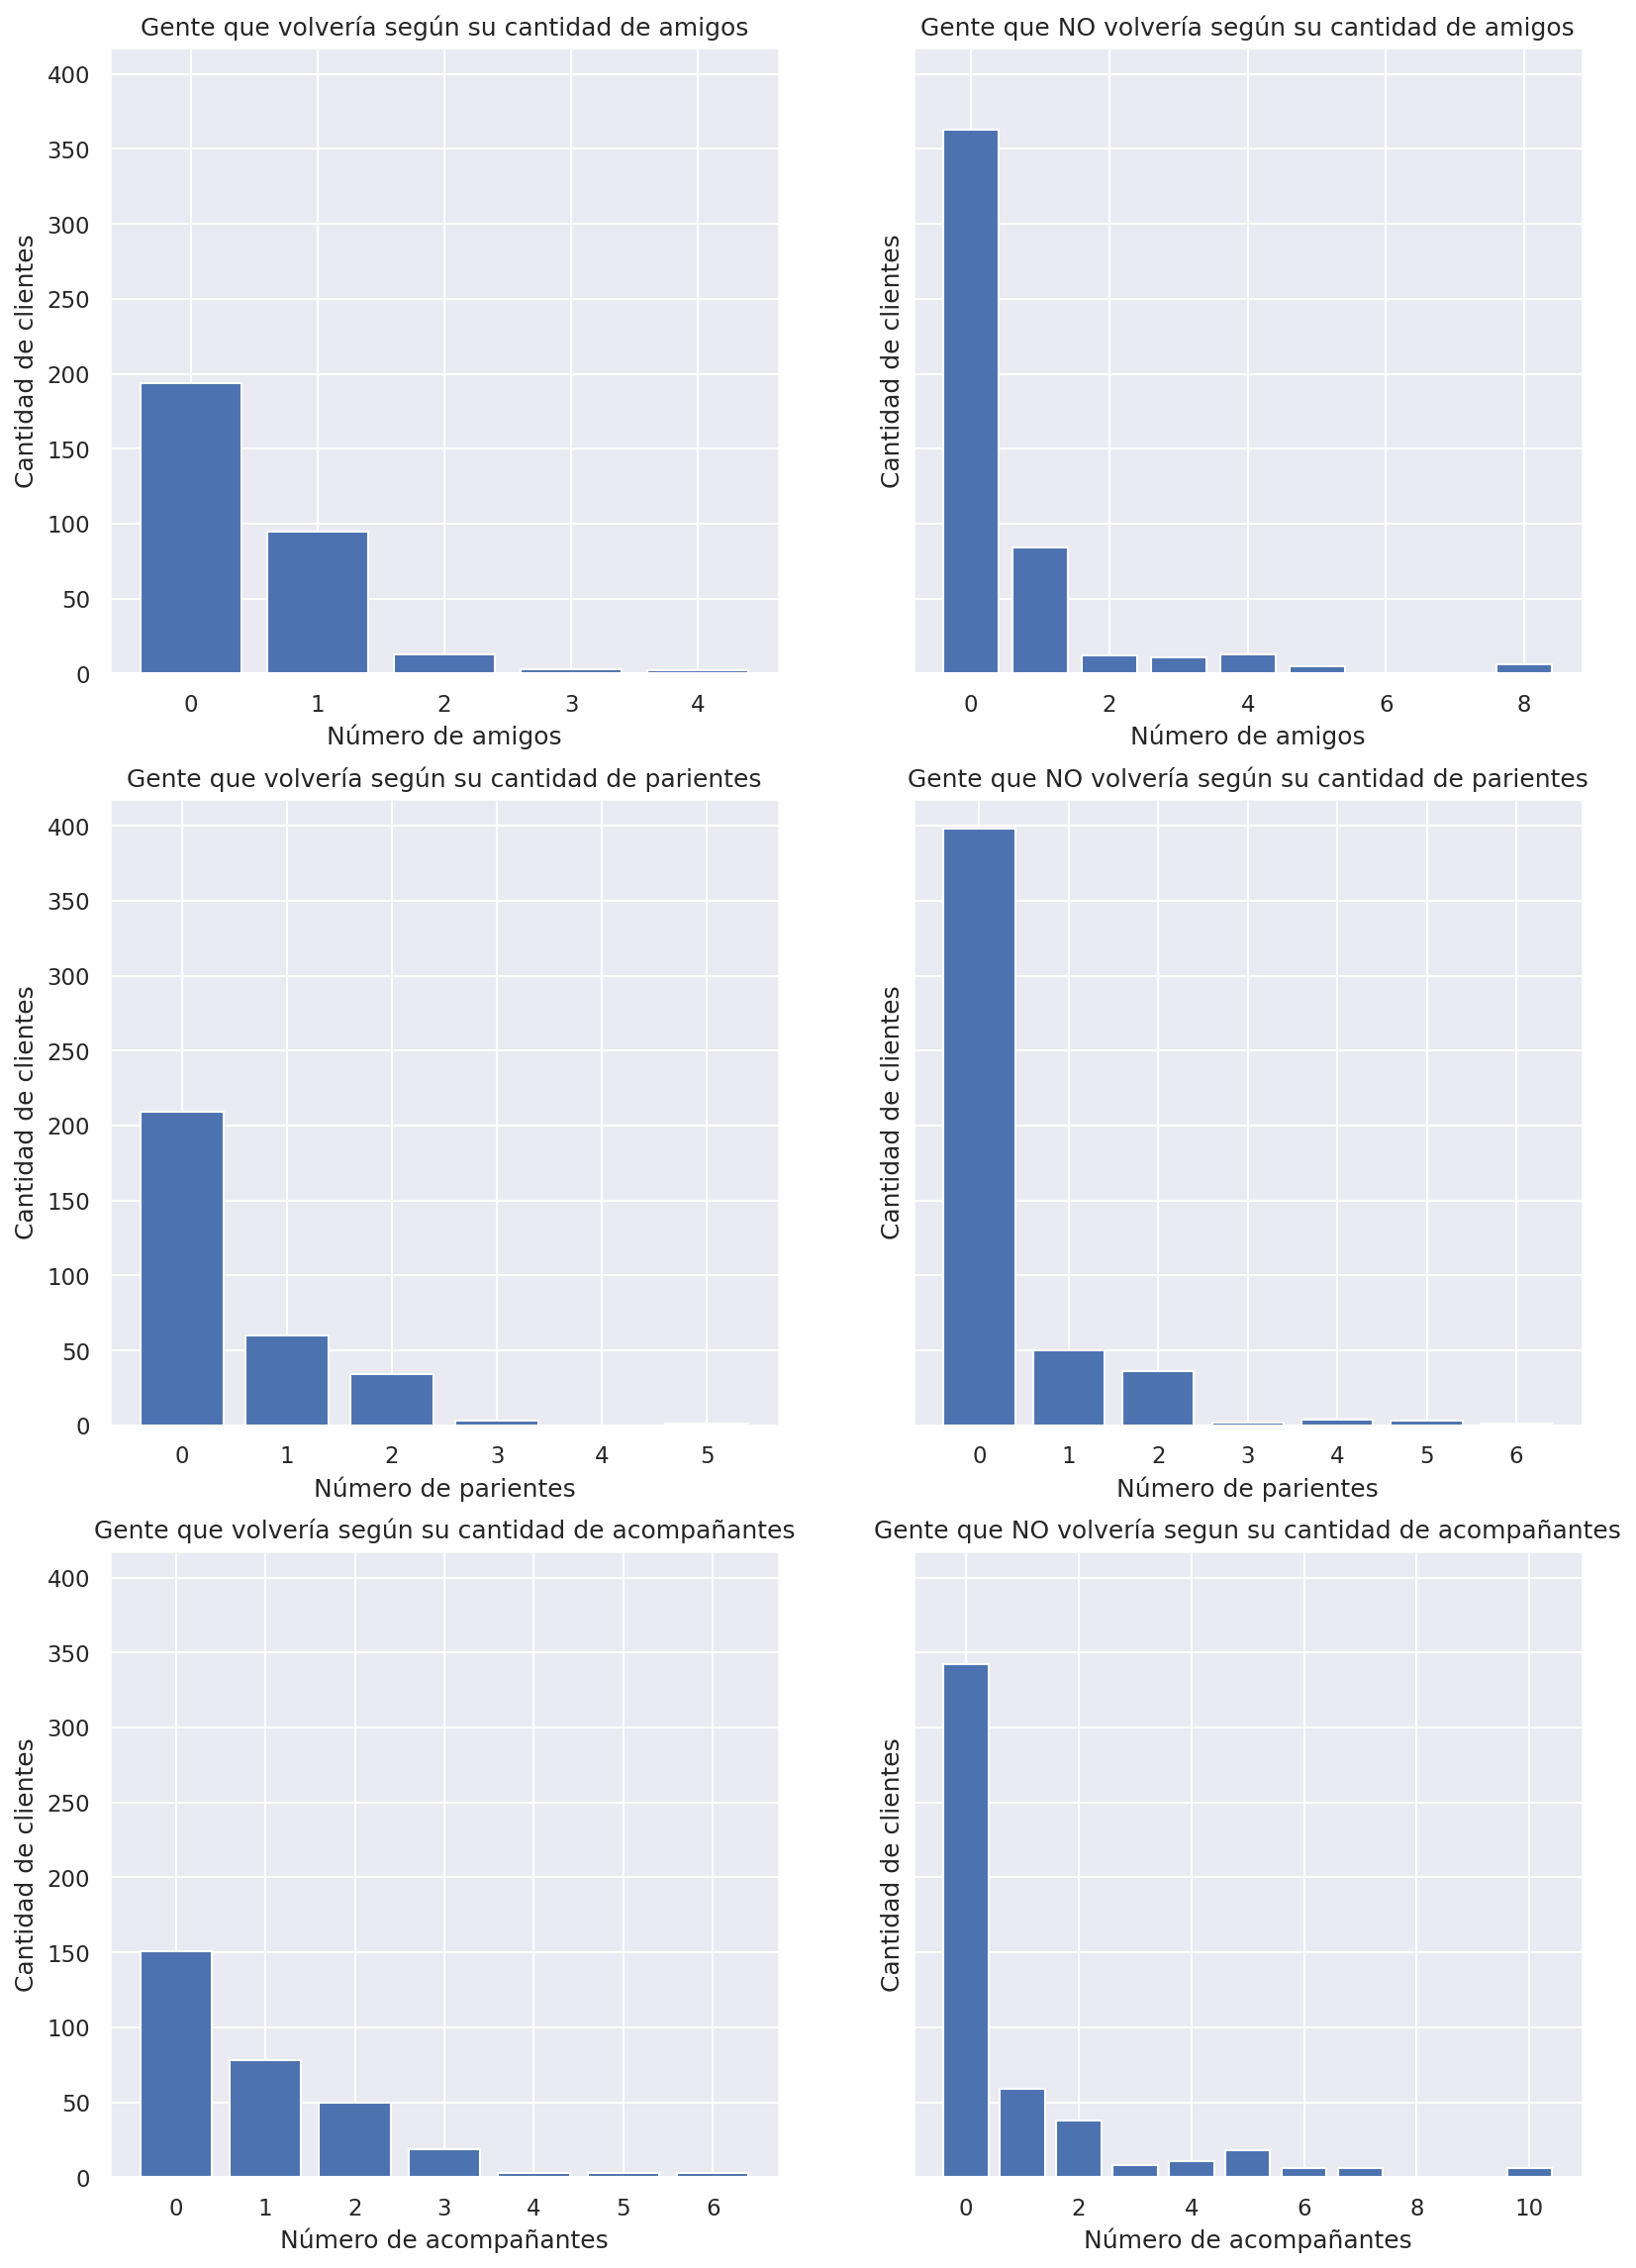

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, sharex=False, dpi=150, figsize=(6.4 * 2, 19))

axes[0][0].bar(df_amigos_volveria['amigos'], height=df_amigos_volveria['aparicion'])
axes[0][0].set_title("Gente que volvería según su cantidad de amigos")
axes[0][0].set_xlabel("Número de amigos")
axes[0][0].set_ylabel("Cantidad de clientes")

axes[0][1].bar(df_amigos_no_volveria['amigos'], height=df_amigos_no_volveria['aparicion'])
axes[0][1].set_title("Gente que NO volvería según su cantidad de amigos")
axes[0][1].set_xlabel("Número de amigos")
axes[0][1].set_ylabel("Cantidad de clientes")

axes[1][0].bar(df_parientes_volveria['parientes'], height=df_parientes_volveria['aparicion'])
axes[1][0].set_title("Gente que volvería según su cantidad de parientes")
axes[1][0].set_xlabel("Número de parientes")
axes[1][0].set_ylabel("Cantidad de clientes")

axes[1][1].bar(df_parientes_no_volveria['parientes'], height=df_parientes_no_volveria['aparicion'])
axes[1][1].set_title("Gente que NO volvería según su cantidad de parientes")
axes[1][1].set_xlabel("Número de parientes")
axes[1][1].set_ylabel("Cantidad de clientes")

axes[2][0].bar(df_acompañado_volveria['cant_acompañantes'], height=df_acompañado_volveria['aparicion'])
axes[2][0].set_title("Gente que volvería según su cantidad de acompañantes")
axes[2][0].set_xlabel("Número de acompañantes")
axes[2][0].set_ylabel("Cantidad de clientes")

axes[2][1].bar(df_acompañado_no_volveria['cant_acompañantes'], height=df_acompañado_no_volveria['aparicion'])
axes[2][1].set_title("Gente que NO volvería segun su cantidad de acompañantes")
axes[2][1].set_xlabel("Número de acompañantes")
axes[2][1].set_ylabel("Cantidad de clientes")

In [ ]:
# TO DO: eje x en todos los charts => DONE

<b>Nuevamente, no podemos concluir nada en base a esto. No podemos decir que la cantidad de gente con la que van los clientes influya en lo mas mínimo en su decisión.</b>

## ¿Haber visto la película en una sala 3D influye a la hora de evaluar la posibilidad de ver la secuela?

In [ ]:
df_3d_volveria = df_volveria[(df_volveria['tipo_de_sala'] == '3d')]
df_3d_sede_volveria = df_3d_volveria.groupby(by=['nombre_sede']).agg({"aparicion": "sum"}).reset_index()

df_3d_no_volveria = df_no_volveria[(df_no_volveria['tipo_de_sala'] == '3d')]
df_3d_sede_no_volveria = df_3d_no_volveria.groupby(by=['nombre_sede']).agg({"aparicion": "sum"}).reset_index()

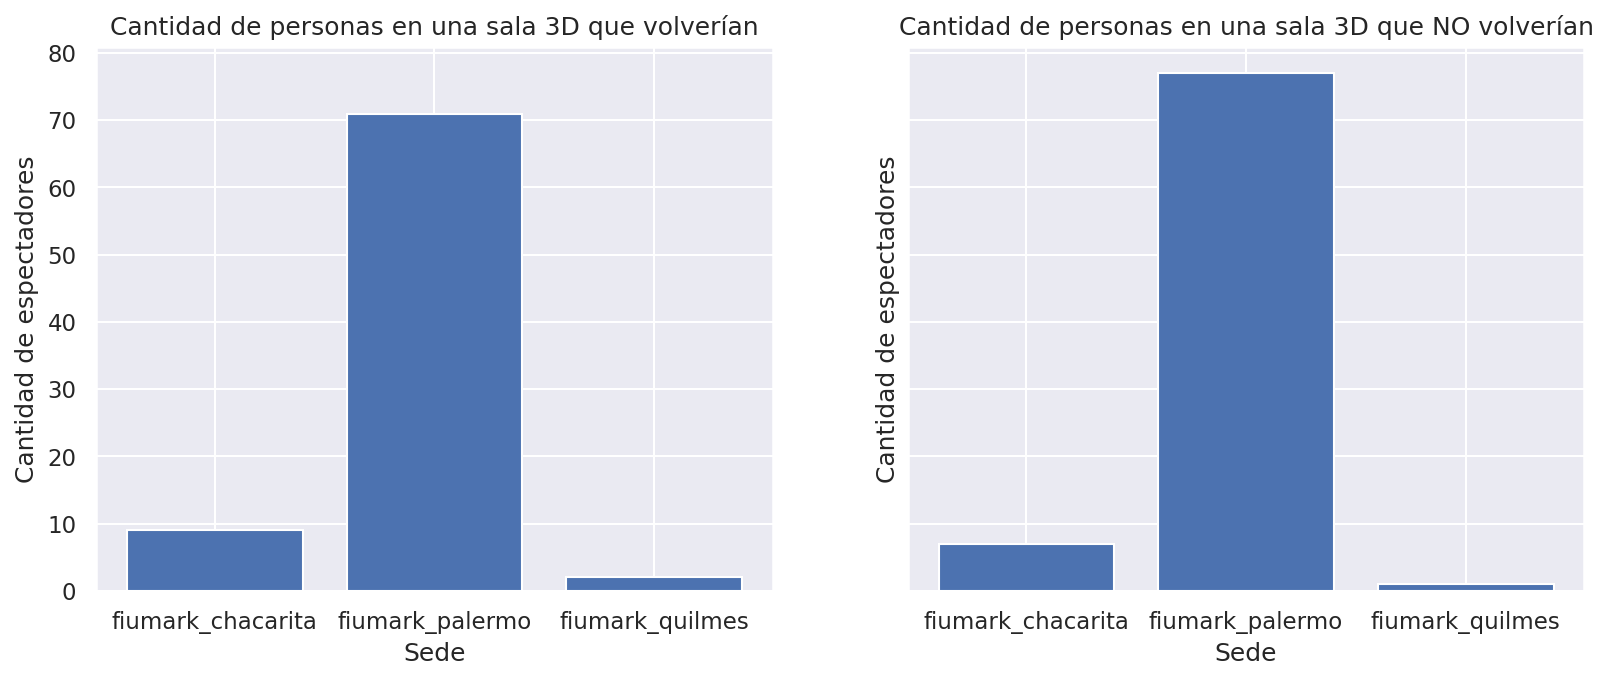

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].bar(df_3d_sede_volveria['nombre_sede'], height=df_3d_sede_volveria['aparicion'])
axes[0].set_title("Cantidad de personas en una sala 3D que volverían")
axes[0].set_xlabel("Sede")
axes[0].set_ylabel("Cantidad de espectadores")

axes[1].bar(df_3d_sede_no_volveria['nombre_sede'], height=df_3d_sede_no_volveria['aparicion'])
axes[1].set_title("Cantidad de personas en una sala 3D que NO volverían")
axes[1].set_xlabel("Sede")
axes[1].set_ylabel("Cantidad de espectadores")

plt.show()

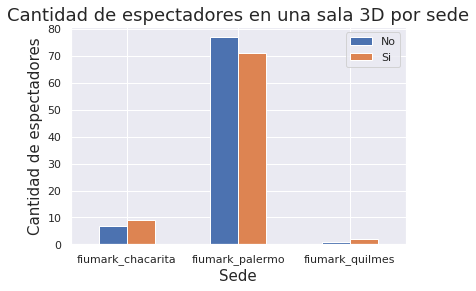

In [ ]:
# TO DO: barplot unico con barras de color por volveria => DONE
df_3d = df[(df['tipo_de_sala'] == '3d')]
df_3d['cont_sala_volveria'] = 1
df_3d = df_3d.drop(['tipo_de_sala', 'nombre', 'genero', 'edad', 'amigos', 'parientes','precio_ticket', 'fila'],axis=1)
df_3d = df_3d.groupby(by=['nombre_sede','volveria']).sum()
df_3d.columns = ['cont_sala_volveria']
df_3d = df_3d.unstack()

g = df_3d.plot.bar()
g.set_title("Cantidad de espectadores en una sala 3D por sede", fontsize=18)
g.set_ylabel("Cantidad de espectadores", fontsize=15)
g.set_xlabel("Sede", fontsize=15)
g.set_xticklabels(labels=df_3d.index,rotation=0)
g.legend([df_3d.columns[0][1],df_3d.columns[1][1]])

Por muy poco, los clientes de la sede Palermo prefieren no volver a una sala 3D, mientras que los de Chacarita y Quilmes sí volverían.

<b>De todas formas, no extraemos ninguna conclusión relevante de estos gráficos. Los valores obtenidos para ambas respuestas son muy similares</b>

## ¿La sede en la que la persona vió Frozen 3 influye en su decisión de volver para ver Frozen 4? 

In [ ]:
df.head()

,tipo_de_sala,nombre,genero,edad,amigos,parientes,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,hombre,74.0,0,0,1,NaN,fiumark_quilmes,No
1,4d,Señora Raquel Angelica,mujer,35.0,1,1,2,NaN,fiumark_quilmes,No
2,normal,Señor Antonio Federico,hombre,NaN,0,0,3,NaN,fiumark_chacarita,No
3,4d,Señor Osvaldo Aureliano,hombre,NaN,0,0,1,NaN,fiumark_palermo,No
4,4d,Señorita Rita Eudosia,mujer,4.0,1,1,2,NaN,fiumark_palermo,Si


In [ ]:
df['cont_volver'] = 1
df_volver_sala = df.loc[:, ['volveria', 'nombre_sede', 'cont_volver']\
                                     ].groupby(by=['volveria', 'nombre_sede']).sum()
df_volver_sala.columns = ['cont_volver']
df_volver_sala = df_volver_sala.unstack()
df_volver_sala

cont_volver                                
nombre_sede fiumark_chacarita fiumark_palermo fiumark_quilmes
volveria                                                     
No                         66             384              44
Si                         83             195              27

In [ ]:
df_volver_sala.sum()

             nombre_sede      
cont_volver  fiumark_chacarita    149
             fiumark_palermo      579
             fiumark_quilmes       71
dtype: int64

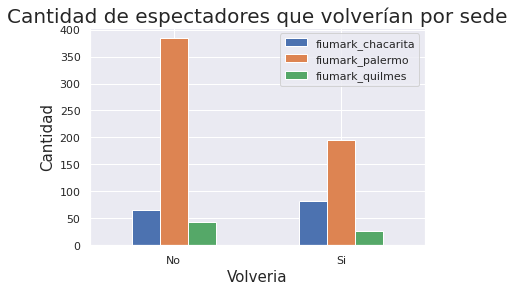

In [ ]:
g = df_volver_sala.plot.bar()
g.set_title("Cantidad de espectadores que volverían por sede", fontsize=20)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Volveria", fontsize=15)
g.set_xticklabels(labels=df_volver_sala.index,rotation=0)
g.legend([df_volver_sala.columns[0][1],df_volver_sala.columns[1][1],df_volver_sala.columns[2][1]])

In [ ]:
#TO DO: bar plot para comparar seria mejor, barras por sede y un chart. => DONE

De este gráfico podemos concluir que en la sede de Palermo hay una mayoría de gente que no regresaría a ver la secuela del film. Sin embargo, en Chacarita 2 de cada 3 personas volverían. Finalmente no podemos decir nada de la sede Quilmes, pues hay muy poca diferencia

## ¿Influye la sala en la que se vió Frozen 3 en la decisión de regresar al cine para ver Frozen 4?    

Veamos si los espectadores de alguna de las salas presentan una mayor tendencia a regresar.

In [ ]:
df['aparicion'] = 1

In [ ]:
# Quilmes
df_quilmes = df[(df['nombre_sede'] == 'fiumark_quilmes')]
df_quilmes = df_quilmes.loc[:, ['volveria', 'tipo_de_sala', 'aparicion']\
                                     ].groupby(by=['tipo_de_sala', 'volveria']).sum()
df_quilmes.columns = ['aparicion']
df_quilmes = df_quilmes.unstack()
df_quilmes


aparicion      
volveria            No    Si
tipo_de_sala                
3d                 1.0   2.0
4d                43.0  24.0
normal             NaN   1.0

In [ ]:
# Palermo
df_palermo = df[(df['nombre_sede'] == 'fiumark_palermo')]
df_palermo = df_palermo.loc[:, ['volveria', 'tipo_de_sala', 'aparicion']\
                                     ].groupby(by=['tipo_de_sala', 'volveria']).sum()
df_palermo.columns = ['aparicion']
df_palermo = df_palermo.unstack()
df_palermo


aparicion    
volveria            No  Si
tipo_de_sala              
3d                  77  71
4d                 263  58
normal              44  66

In [ ]:
# Chacarita
df_chacarita = df[(df['nombre_sede'] == 'fiumark_chacarita')]
df_chacarita = df_chacarita.loc[:, ['volveria', 'tipo_de_sala', 'aparicion']\
                                     ].groupby(by=['tipo_de_sala', 'volveria']).sum()
df_chacarita.columns = ['aparicion']
df_chacarita = df_chacarita.unstack()
df_chacarita


aparicion    
volveria            No  Si
tipo_de_sala              
3d                   7   9
4d                  36  23
normal              23  51

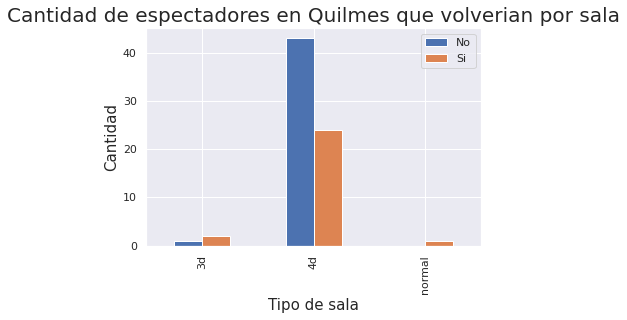

In [ ]:
g = df_quilmes.plot.bar()
g.set_title("Cantidad de espectadores en Quilmes que volverian por sala", fontsize=20)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Tipo de sala", fontsize=15)
g.legend([df_quilmes.columns[0][1],df_quilmes.columns[1][1]])


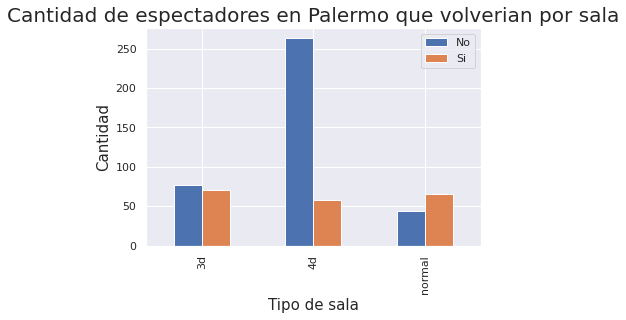

In [ ]:
g = df_palermo.plot.bar()
g.set_title("Cantidad de espectadores en Palermo que volverian por sala", fontsize=20)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Tipo de sala", fontsize=15)
g.legend([df_palermo.columns[0][1],df_palermo.columns[1][1]])

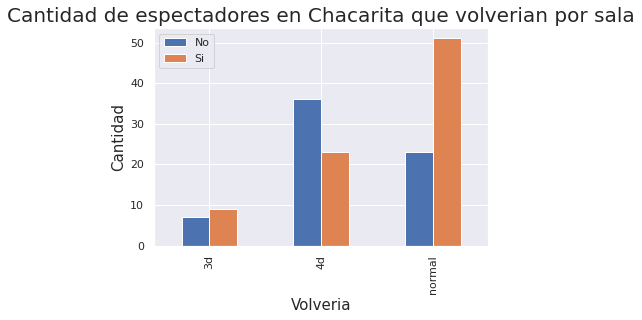

In [ ]:
g = df_chacarita.plot.bar()
g.set_title("Cantidad de espectadores en Chacarita que volverian por sala", fontsize=20)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Volveria", fontsize=15)
g.legend([df_chacarita.columns[0][1],df_chacarita.columns[1][1]])

Las conclusiones que podemos extraer de los 3 graficos anteriores son:

<ol>
<li>Para el caso de FiuMark Quilmes:
    <ol>
    <li>Sala 4D: la cantidad de personas que no regresarían supera a la cantidad que sí lo haría.</li>
    <li>Sala normal: todas las personas encuestadas que declararon asistir a esta sala regresarían.</li>
    </ol>
        </li>        
<li>Para el caso de FiuMark Palermo:
    <ol>
<li>Sala 4D: la mayoría de los espectadores no regresaría a esta sala.</li>
<li>Sala normal: hay más gente que sí regresará.</li>
        </ol>
    </li>
<li>Para el caso de FiuMark Chacarita:
    <ol>
<li>Sala 4D: hay más gente que no volverá a ver la secuela.</li>
<li>Sala normal: hay más gente que sí regresará.</li>
        </ol>
        </li>
</ol>        
Para el caso de las salas 3D, no se añaden comentarios porque no se distingue una diferencia explícita que lo amerite.

<b>La conclusión más importante de esta sección es sin dudas el hecho de que la mayoría de los espectadores que vieron Frozen 3 en la sala 4D de la sede FiuMark Palermo no regresarían a ver Frozen 4.</b>

### ¿Será que las entradas en la sala 4D de la sede FiuMark Palermo son más caras que en el resto de los cines?
### ¿Puede ser que el rechazo hacia esa sede esté relacionado al costo de las entradas?

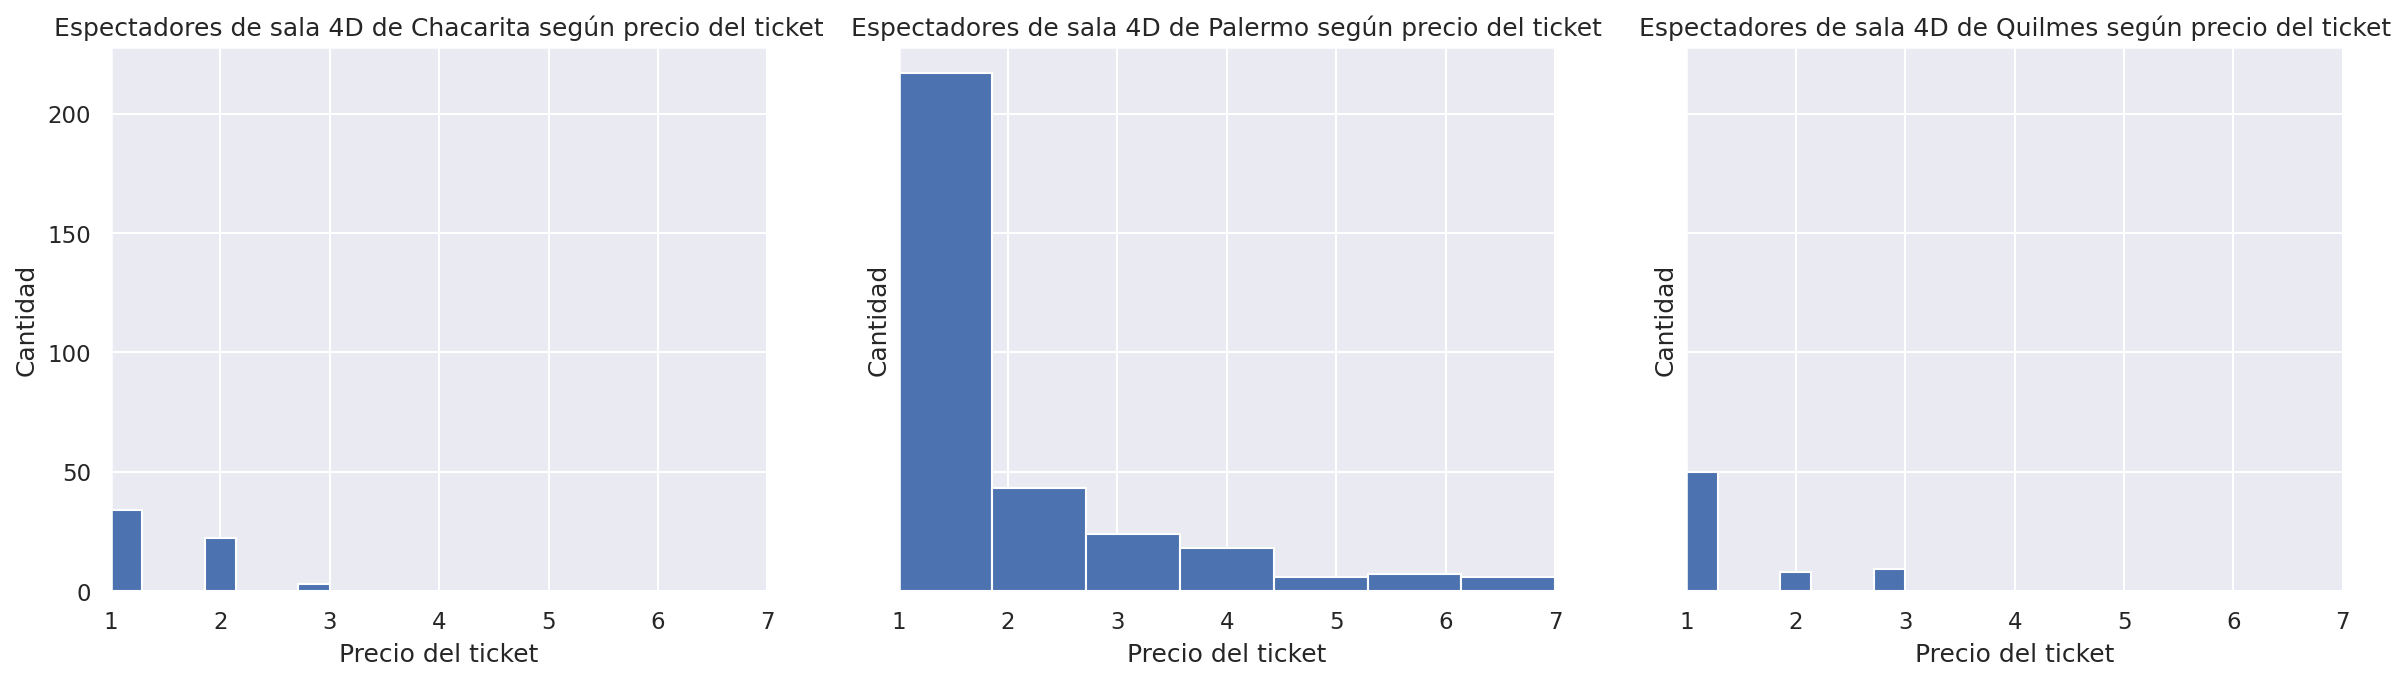

In [ ]:
df_chacarita_4d = df[(df['nombre_sede'] == 'fiumark_chacarita') & (df['tipo_de_sala'] == '4d')]
df_palermo_4d = df[(df['nombre_sede'] == 'fiumark_palermo') & (df['tipo_de_sala'] == '4d')]
df_quilmes_4d = df[(df['nombre_sede'] == 'fiumark_quilmes') & (df['tipo_de_sala'] == '4d')]

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, dpi=150, figsize=(6.4 * 3, 4.8))

axes[0].hist(df_chacarita_4d['precio_ticket'], bins=7)
axes[0].set_title("Espectadores de sala 4D de Chacarita según precio del ticket")
axes[0].set_xlabel("Precio del ticket")
axes[0].set_ylabel("Cantidad")
axes[0].set_xlim(1,7)

axes[1].hist(df_palermo_4d['precio_ticket'], bins=7)
axes[1].set_title("Espectadores de sala 4D de Palermo según precio del ticket")
axes[1].set_xlabel("Precio del ticket")
axes[1].set_ylabel("Cantidad")
axes[1].set_xlim(1,7)

axes[2].hist(df_quilmes_4d['precio_ticket'], bins=7)
axes[2].set_title("Espectadores de sala 4D de Quilmes según precio del ticket")
axes[2].set_xlabel("Precio del ticket")
axes[2].set_ylabel("Cantidad")
axes[2].set_xlim(1,7)



plt.show()

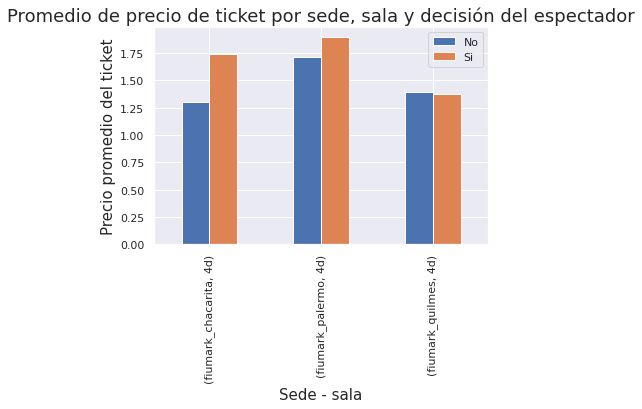

In [ ]:
df_promedio_precios_4d = df[df['tipo_de_sala'] == '4d'].groupby(['nombre_sede','tipo_de_sala','volveria']).agg({'precio_ticket':'mean'})

df_promedio_precios_4d=df_promedio_precios_4d.unstack()
df_promedio_precios_4d

g = df_promedio_precios_4d.plot.bar()
g.set_title("Promedio de precio de ticket por sede, sala y decisión del espectador", fontsize=18)
g.set_ylabel("Precio promedio del ticket", fontsize=15)
g.set_xlabel("Sede - sala", fontsize=15)
g.legend([df_promedio_precios_4d.columns[0][1],df_promedio_precios_4d.columns[1][1]])

Podemos ver que en las 3 sedes el promedio del precio de la entrada a salas 4D es prácticamente igual. A nivel general, casi no hay diferencias entre lo que pagaron los espectadores. Descartamos entonces la hipótesis de que el precio de las entradas 4d en la sede palermitana sea el factor que genera la mayor disconformidad.

<b>Podemos afirmar que el rechazo por parte de los espectadores hacia esta sala no está directamente relacionado al costo de la entrada.</b>

In [ ]:
#TO DO: agregar grafico que justifique la conclusion = DONE

### ¿Será que la edad de los espectadores influye en la decisión de rechazar a la sala 4D de Palermo?

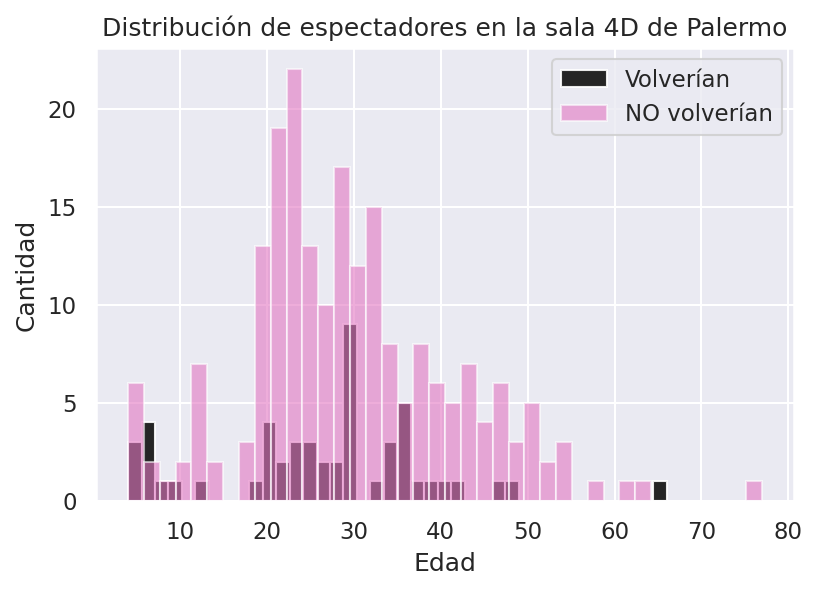

In [ ]:
df_palermo_4d_volveria = df_palermo_4d[df_palermo_4d['volveria'] == 'Si']
df_palermo_4d_no_volveria = df_palermo_4d[df_palermo_4d['volveria'] == 'No']

plt.figure(dpi=150)

plt.hist(
    df_palermo_4d_volveria['edad'],
    bins=40,
    label="Volverían",
    alpha=0.9, color='#0f0f0f80',
)
plt.hist(
    df_palermo_4d_no_volveria['edad'],
    bins=40,
    label="NO volverían",
    alpha=0.6, 
    color = '#e377c2',
)
plt.title("Distribución de espectadores en la sala 4D de Palermo")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.legend()

plt.show()

De este gráfico podemos ver que claramente no hay una predominancia significativa, por la edad, de si la gente 
quiere volver.

<b>En este contexto no cabe duda de que los clientes de esta sala tienden a no querer volver, y esto es indistinto de la edad.</b>

### ¿Será que el rechazo a esta sala tiene alguna relación con el género de la persona?

In [ ]:
df_p4d_genero_volveria = df_palermo_4d_volveria.copy()
df_p4d_genero_volveria['aparicion'] = 1
df_p4d_genero_volveria = df_p4d_genero_volveria.groupby(by=['genero']).agg({"aparicion": "sum"}).reset_index()

df_p4d_genero_no_volveria = df_palermo_4d_no_volveria.copy()
df_p4d_genero_no_volveria['aparicion'] = 1
df_p4d_genero_no_volveria = df_p4d_genero_no_volveria.groupby(by=['genero']).agg({"aparicion": "sum"}\
                                                                                ).reset_index()

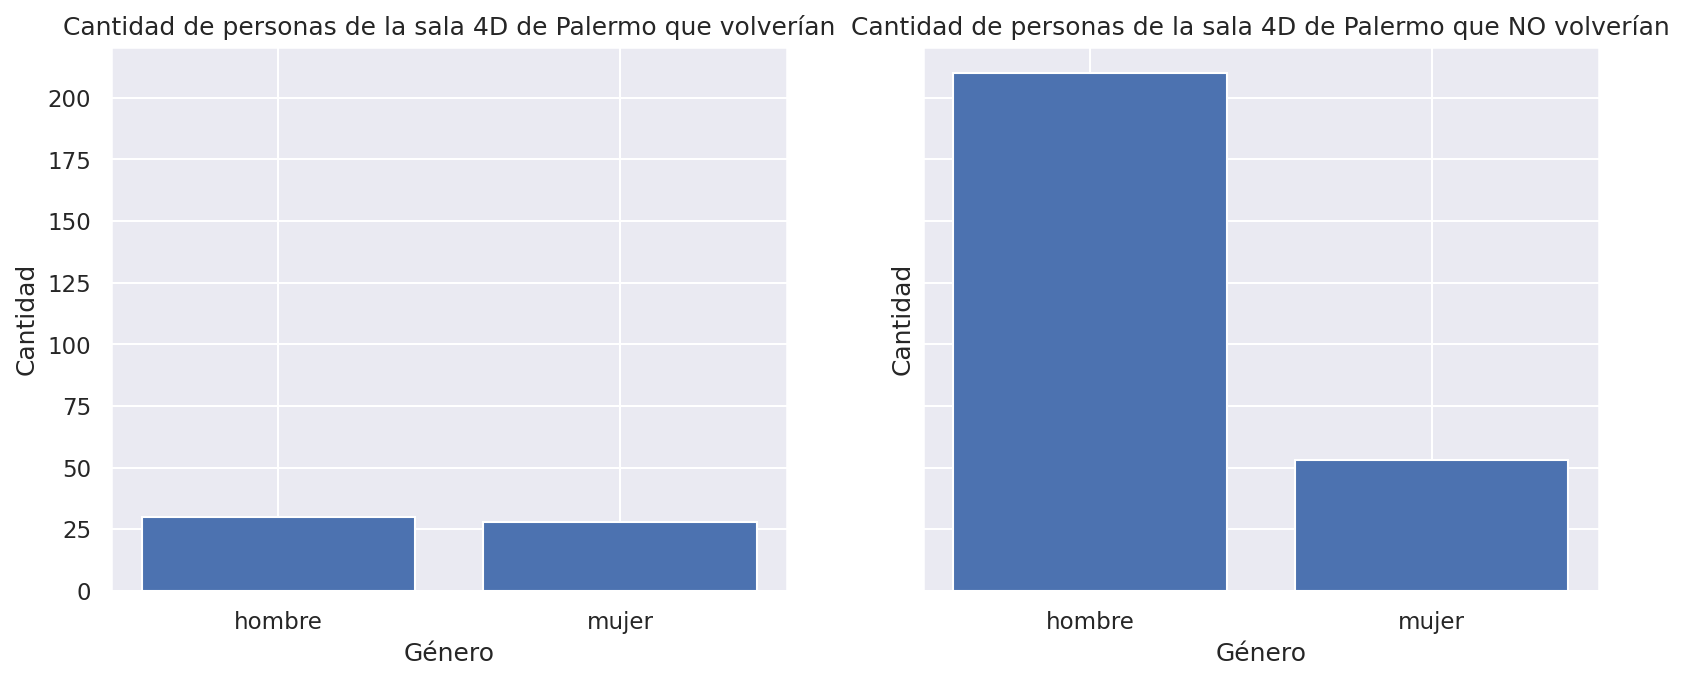

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].bar(df_p4d_genero_volveria['genero'], height=df_p4d_genero_volveria['aparicion'])
axes[0].set_title("Cantidad de personas de la sala 4D de Palermo que volverían")
axes[0].set_xlabel("Género")
axes[0].set_ylabel("Cantidad")

axes[1].bar(df_p4d_genero_no_volveria['genero'], height=df_p4d_genero_no_volveria['aparicion'])
axes[1].set_title("Cantidad de personas de la sala 4D de Palermo que NO volverían")
axes[1].set_xlabel("Género")
axes[1].set_ylabel("Cantidad")

plt.show()

Nuevamente podemos ver que para este dúo sala-sede, hay pocas respuestas afirmativas en la encuesta.

<b>Con respecto al género, podemos destacar un mayor número de hombres que de mujeres rechazando la secuela.</b>

En la siguiente sección profundizaremos a nivel general sobre la injerencia del género en las respuestas recolectadas.

## ¿Influye el género de la persona en la decisión de regresar al cine para ver Frozen 4?    

Todos los encuestados de nuestro dataset se identifican con alguno de los siguientes dos géneros: <i>hombre</i> o <i>mujer</i>.

In [ ]:
df['cont_volver_genero'] = 1
df_volver_genero = df.loc[:, ['volveria', 'genero', 'cont_volver_genero']\
                                     ].groupby(by=["volveria", "genero"]).sum()
df_volver_genero.columns = ['cont_volver_genero']
df_volver_genero = df_volver_genero.unstack()
df_volver_genero

cont_volver_genero      
genero               hombre mujer
volveria                         
No                      419    75
Si                       94   213

In [ ]:
df_volver_genero.sum()

                    genero
cont_volver_genero  hombre    513
                    mujer     288
dtype: int64

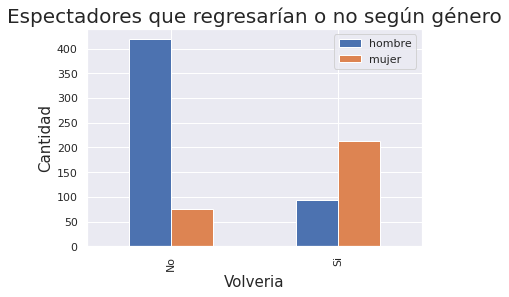

In [ ]:
g = df_volver_genero.plot.bar()
g.set_title("Espectadores que regresarían o no según género", fontsize=20)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Volveria", fontsize=15)
g.legend([df_volver_genero.columns[0][1],df_volver_genero.columns[1][1]])

In [ ]:
df['cont_genero_volver'] = 1
df_genero_volver = df.loc[:, ['volveria', 'genero', 'cont_genero_volver']\
                                     ].groupby(by=["genero", "volveria"]).sum()
df_genero_volver.columns = ['cont_genero_volver']
df_genero_volver = df_genero_volver.unstack()
df_genero_volver

cont_genero_volver     
volveria                 No   Si
genero                          
hombre                  419   94
mujer                    75  213

In [ ]:
df_genero_volver.sum()

                    volveria
cont_genero_volver  No          494
                    Si          307
dtype: int64

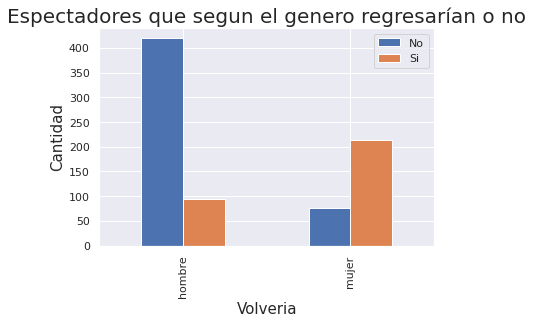

In [ ]:
g = df_genero_volver.plot.bar()
g.set_title("Espectadores que segun el genero regresarían o no", fontsize=20)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Volveria", fontsize=15)
g.legend([df_genero_volver.columns[0][1],df_genero_volver.columns[1][1]])

Las tendencias son muy claras. La gran mayoria de todos los que no desean ver Frozen 4 son hombres, y de la totalidad de hombres que vieron la película, un 80% no tiene intenciones de ver la secuela. En el caso de las mujeres se ve una alta tendencia hacia el lado opuesto, es decir, es probable que vean Frozen 4 en el mismo cine.

<b>Si el espectador es hombre es muy poco probable que quiera ver Frozen 4</b>

Esta conclusión será muy importante a la hora de generar el baseline.

# Baseline

En base a las conclusiones resaltadas previamente definimos una función de Python que nos permite predecir si un espectador volverá a la sala para ver Frozen 4 o no.

El análisis por género, y los detalles evaluados para la sala 4D del cine de Palermo nos permitieron desarrollar el baseline final.

Durante el desarrollo fuimos probando varias funciones, pero dejamos las dos que tuvieron mejor accuracy. 

In [ ]:
def predict_with_gender(gender):
    if gender == 'hombre':
        return 0
    return 1

def predict_with_cinema_and_room_type(row):
    room_type = row['tipo_de_sala']
    cinema = row['nombre_sede']
    if (room_type == '4d') & (cinema == 'fiumark_palermo'):
        return 0
    return 1

df_prediccion['prediccion_1'] = df_prediccion['genero'].apply(predict_with_gender)
df_prediccion['prediccion_2'] = df_prediccion.apply(predict_with_cinema_and_room_type,axis=1)

def predict(row):
    gender = row['genero']
    room_type = row['tipo_de_sala']
    cinema = row['nombre_sede']
    if gender == 'hombre':
        return 0
    else:
        if (room_type == '4d') & (cinema == 'fiumark_palermo'):
            return 0
        return 1

df_prediccion['prediccion_final'] = df_prediccion.apply(predict,axis=1)

In [ ]:
def baseline_test(dataframe):
    print("El accuracy obtenido con la prediccion 1 es de ",accuracy_score(dataframe['volveria'],dataframe['prediccion_1'])*100,"%")
    print("El accuracy obtenido con la prediccion 2 es de ",accuracy_score(dataframe['volveria'],dataframe['prediccion_2'])*100,"%")
    print("El accuracy obtenido con la prediccion final es de ",accuracy_score(dataframe['volveria'],dataframe['prediccion_final'])*100,"%")

baseline_test(df_prediccion)

El accuracy obtenido con la prediccion 1 es de  78.90137328339576 %
El accuracy obtenido con la prediccion 2 es de  63.920099875156055 %
El accuracy obtenido con la prediccion final es de  82.02247191011236 %


In [ ]:
# TO DO: cambiar itterrows por apply con logica pandas = DONE

Si solo consideramos el género a la hora de clasificar obtenemos un accuracy de 78,9%. Y en el caso de limitarnos a predecir 0 para los registros de la sala 4D de Palermo tenemos 63.9 % de exactitud. Lo interesante es combinar las dos funciones y así obtener un accuracy final de <b>82%</b>

In [ ]:
df_prediccion = df_prediccion.drop(['prediccion_1','prediccion_2','prediccion_final'],axis=1)

In [ ]:
def baseline(dataframe):
    prediccion_final = dataframe.apply(predict,axis=1)
    return prediccion_final

print(accuracy_score(df_decision['volveria'],baseline(df_prediccion)))    

0.8202247191011236
